In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We load the trajectory using a topology file (in this case a pdb) and a trajectory file (the dcd)
#U = MDA.Universe('exampleProtein.pdb','exampleTraj.dcd')
traj = md.load('exampleTraj.dcd', top='exampleProtein.pdb')

# And get the number of frames in our trajectory
numFrames = len(traj)


In [11]:
# Prepare a list to contain the atom numbers of each first shell water's oxygen in each frame
firstShells = []

proteinSelection = traj.topology.select('protein')
waterSelection = traj.topology.select('water and name O')
## Select all the water oxygens within 2 angstroms of the protein.
watersNearProtein = md.compute_neighbors(traj, 
                                         0.2, 
                                         proteinSelection,
                                         haystack_indices=waterSelection)

# Get a list of the "atom index" of each of the oxygens
watersNearProtein = [set(i) for i in watersNearProtein]
# Make a "set" based on these numbers. You'll see why sets are useful later
#firstShellResIndicesSet = set(watersNearProtein)
# Store the set in a list
#firstShells.append(firstShellResIndices)


In [12]:
print len(watersNearProtein[0])

1673


In [16]:
firstOverlapMat = np.zeros((numFrames, numFrames))
for i in range(numFrames):
    for j in range(i, numFrames):
        overlap = len(watersNearProtein[i] & watersNearProtein[j])
        firstOverlapMat[i,j] = overlap
        firstOverlapMat[j,i] = overlap
        

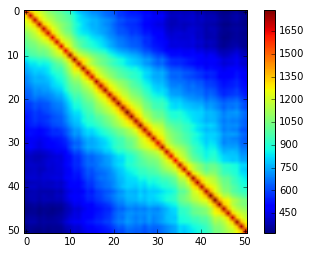

In [17]:
plt.imshow(firstOverlapMat)
plt.colorbar()
plt.show()

In [18]:
# Prepare a numpy array (a generally useful format for large amounts of data) to hold 
# the frame-to-frame similarity values
firstOverlapMat = np.zeros((numFrames, numFrames))
nLeftList = []
nStayedList = []

# Now we go through each frame and compare it to all the others
for frameIndex in range(numFrames-1):
    # Here's one handy thing we can do with sets - subtraction find the elements of 
    # one set that aren't in another
    watersThatLeft = watersNearProtein[frameIndex] - watersNearProtein[frameIndex+1]
    # And the len() of a set is the number of items in it
    numWatersThatLeft = len(watersThatLeft)
    # The & operator returns items which appear in both 
    watersThatStayed = watersNearProtein[frameIndex] & watersNearProtein[frameIndex+1]
    numWatersThatStayed = len(watersThatStayed)
    
    print '%i waters left the first shell this frame, and %i stayed' %(numWatersThatLeft,numWatersThatStayed)

    # Store the results in a list
    nLeftList.append(numWatersThatLeft)
    nStayedList.append(numWatersThatStayed)



351 waters left the first shell this frame, and 1322 stayed
346 waters left the first shell this frame, and 1342 stayed
357 waters left the first shell this frame, and 1347 stayed
374 waters left the first shell this frame, and 1338 stayed
331 waters left the first shell this frame, and 1373 stayed
362 waters left the first shell this frame, and 1336 stayed
337 waters left the first shell this frame, and 1332 stayed
382 waters left the first shell this frame, and 1312 stayed
381 waters left the first shell this frame, and 1291 stayed
321 waters left the first shell this frame, and 1347 stayed
415 waters left the first shell this frame, and 1333 stayed
401 waters left the first shell this frame, and 1343 stayed
388 waters left the first shell this frame, and 1331 stayed
377 waters left the first shell this frame, and 1354 stayed
353 waters left the first shell this frame, and 1363 stayed
362 waters left the first shell this frame, and 1324 stayed
354 waters left the first shell this fra

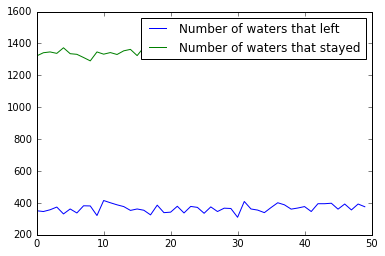

In [19]:
# And now we can use the pylab module to plot them
plt.plot(nLeftList,label='Number of waters that left')
plt.plot(nStayedList,label='Number of waters that stayed')
plt.legend()
plt.show()
